# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


---

**Баллы за задание:**

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (учитывается только в основной части курса, необходимо на "отл"):
* Задача 1 &mdash; 70 баллов

<b><a href="#Факультативная-часть" style="text-decoration: none;"><font color="green">Факультативная часть</font></a></b> (учитывается только в факультативной части курса):
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 70 баллов

**Внимание!** Указанные баллы являются бонусными. Они не учитываются в максимальных суммах баллов в знаменателе при вычислении процента выполненных заданий. Но все полученные вами баллы будут учтены в числителе. Тем самым, выполняя или не выполняя домашку, вы не сможете понизить оценку, но сможете ее повысить.

In [1]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

**Внимание!**
В первую очередь задание призвано помочь вам понять, какие навыки стоит развивать, и может быть даже выбрать подходящую кафедру. Однако, не стоит идти на работу/стажировку раньше времени. Даже только летнюю, абсолютное большинство людей не могут работать круглый год без перерыва. У всех из вас 3 курс достаточно нагруженный, а на DS-потоке нагрузка с первой недели сентября. И если вы идете на стажировку, то каникул у вас может просто не остаться. Даже если вам сейчас/летом/в сентябре кажется "я же справлюсь", к ноябрю-декабрю с большой вероятностью вы выдохнетесь. Таких примеров *очень много*. Не все, кто-то успешно справляется совмещать работу и учебу, но таких *очень мало*. Берегите себя и свое здоровье :)

---

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [2]:
URL = "https://api.hh.ru/vacancies"

params = {
    "text": "Data Scientist",
    "area": 1,
    "page": 0,
    "per_page": 10,
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [4]:
data["items"][0]

{'id': '98612984',
 'premium': False,
 'name': 'Petroleum Engineer (Baku)',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-08T13:10:45+0300',
 'created_at': '2024-05-08T13:10:45+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98612984',
 'show_logo_in_search': None,
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/98612984?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/98612984',
 'relations': [],
 'employer': {'id': '1068',
  'name': 'Cornerstone Russia',
  'url': 'https://api.hh.ru/employers/1068',
  'alternate_url': 'https://hh.ru/employer/1068',
  'logo_urls': {'240': 'https://img.hhcdn.ru/employer-logo/1643847.jpeg',
   'original': 'https://img

Сколько всего найдено вакансий

In [5]:
data["found"]

356

Количество страниц в результатах поиска

In [6]:
data["pages"]

36

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [7]:
df = pd.json_normalize(data["items"])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,branding.type,branding.tariff,employer.logo_urls,department.id,department.name
0,98612984,False,Petroleum Engineer (Baku),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98594437,False,Data Scientist,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98592181,False,Аналитик данных/Junior DATA SCIENTIST,NaN,False,False,NaN,NaN,None,None,...,Филевская,4.73,4,55.740544,37.534100,MAKEUP,None,NaN,NaN,NaN
3,97821551,False,Chief data officer,NaN,False,False,NaN,NaN,None,None,...,Замоскворецкая,2.2,2,55.706634,37.657008,MAKEUP,None,NaN,NaN,NaN
4,97615359,False,Junior Data Scientist / Младший аналитик данных,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,MAKEUP,None,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [8]:
vacancy = df["id"].iloc[0]
vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [9]:
vacancy_info

{'id': '98612984',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Petroleum Engineer (Baku)',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p><strong>PE Specialist will be working with Data Scientists to solve complex Petroleum Engineering problems by development of digital solutions and automation techniques.</strong></p> <p><strong>Responsibilities for this position may include but are not limited to:</strong></p> <ul> <li> <p>Performing Inflow Performance Relationship (IPR) analysis;</p> </li> <li> <

---

### <font color="orange"><i>Сложная часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [3]:
URL = "https://api.hh.ru/vacancies"

dfs = []  # Список для хранения всех DataFrame

for i in range(20):
    params = {
        "text": "Аналитик данных",
        "area": 1,
        "page": i,
        "per_page": 10,
    }

    req = requests.get(URL, params)
    data = req.json()

    if not data or 'items' not in data:
        break  # Прерываем цикл, если данных нет

    current_df = pd.DataFrame(data['items'])
    dfs.append(current_df)

# Объединяем все DataFrame из списка в один
merged_df = pd.concat(dfs, ignore_index=True)

In [4]:
merged_df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding,show_logo_in_search
0,98485147,False,Тестировщик сайтов,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 60000, 'to': 110000, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",None,...,True,"[{'id': '124', 'name': 'Тестировщик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'part', 'name': 'Частичная занятость'}",None,False,None,NaN,NaN
1,98765776,False,Главный эксперт по планированию запасов,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 220000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '66', 'name': 'Менеджер по закупкам'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,"{'type': 'MAKEUP', 'tariff': None}",True
2,98784294,False,Frontend-разработчик в продуктовую команду в с...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 20000, 'to': 40000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN,NaN
3,98757319,False,Тестировщик ПО,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 130000, 'to': 130000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': '109316, Москва г, Волгоградский пр-к...",...,False,"[{'id': '124', 'name': 'Тестировщик'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,"{'type': 'MAKEUP', 'tariff': None}",True
4,98777605,False,Game Designer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '25', 'name': 'Гейм-дизайнер'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,95865510,False,Специалист по обработке и анализу данных,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 165000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Раушская набереж...",...,False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN,None
196,98785579,False,Руководитель группы Power BI-аналитиков,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 360000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",None,...,True,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN,None
197,94595084,False,Ведущий специалист по работе с Excel,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 100000, 'to': 120000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '40', 'name': 'Другое'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN,None
198,97462285,False,Инженер-аналитик,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",None,...,False,"[{'id': '47', 'name': 'Инженер ПТО, инженер-см...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN,None


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [5]:
merged_df.dropna()
merged_df.drop_duplicates(subset=['id'], inplace=True)

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [6]:
vacancy = merged_df["id"].iloc[0]
vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())
vacancy_info

{'id': '98485147',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Тестировщик сайтов',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 60000, 'to': 110000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'part', 'name': 'Частичная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p>В данный момент рассматриваем кандидатов как с опытом так и без опыта работы, на позицию младшего тестировщика.</p> <p><br />Обязанности:</p> <p>- Выполнение работы в рамках тест кейсов<br />- Ведение отчетности о найденных ошибках/багах и других проблем<br />- Взаимодействие с членами команды, для 

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [7]:
output_file = "vacancies_data.xlsx"
merged_df.to_excel(output_file, index=False)

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [8]:
merged_df.shape[0]

200

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

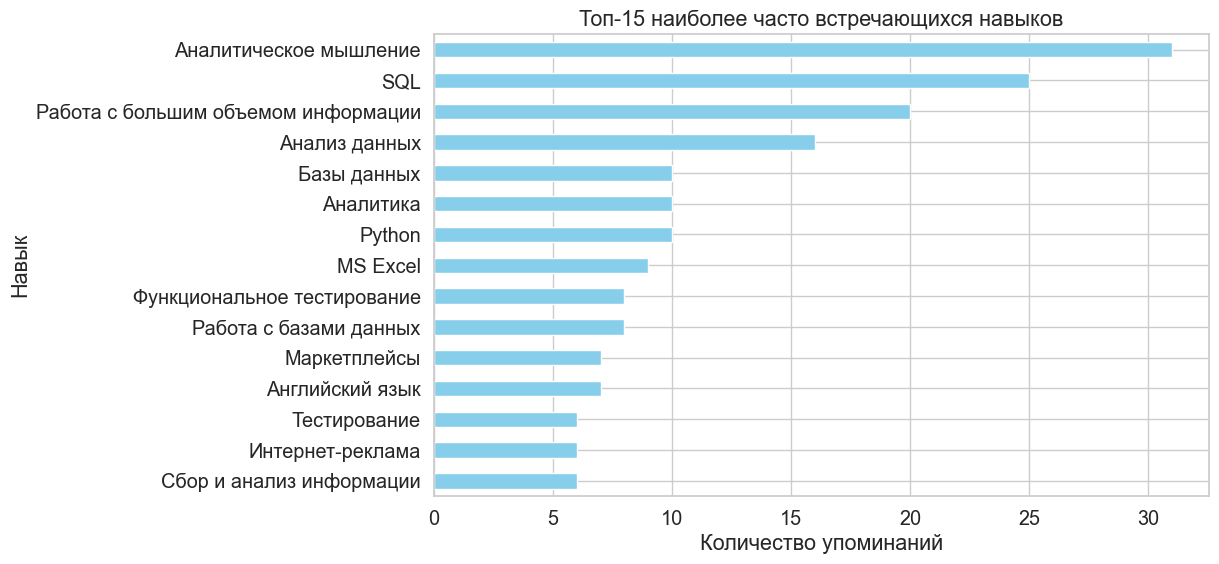

In [9]:
all_skills = []
reqs = []
for i in range(200):
    vacancy = merged_df["id"].iloc[i]
    vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    reqs.append(req)
    # Проверяем наличие ключа 'key_skills' в данных о вакансии
    if 'key_skills' in vacancy_info:
        # Извлекаем список навыков из данных о вакансии
        skills_list = [skill['name'] for skill in vacancy_info['key_skills']]
        # Добавляем навыки текущей вакансии в общий список всех навыков
        all_skills.extend(skills_list)

# Подсчет количества упоминаний каждого навыка
skills_count = pd.Series(all_skills).value_counts()

# Визуализация топ-15 наиболее часто встречающихся навыков
top_skills = skills_count.head(15)

top_skills.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Топ-15 наиболее часто встречающихся навыков')
plt.xlabel('Количество упоминаний')
plt.ylabel('Навык')
plt.gca().invert_yaxis()
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

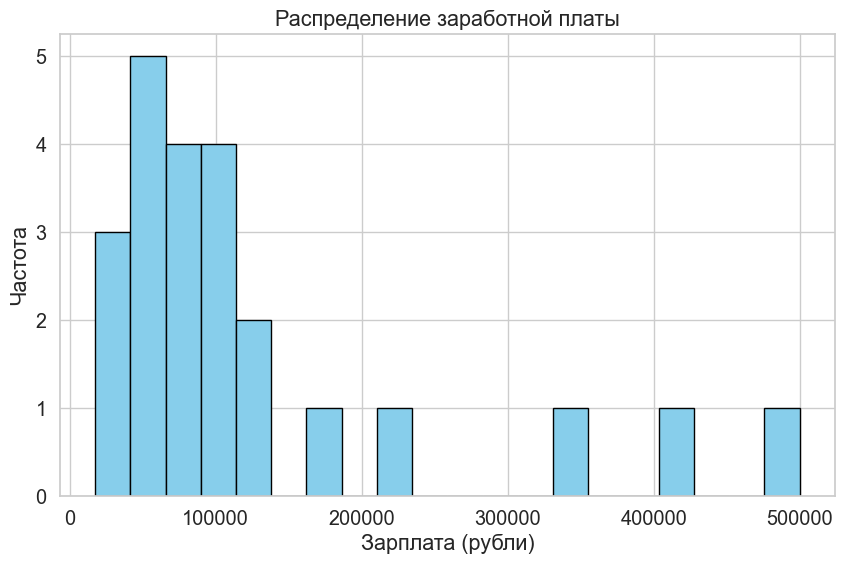

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

salaries = []

for req in reqs:
    vacancy_info = json.loads(req.content.decode())

    # Извлекаем информацию о зарплате из данных о вакансии
    salary = vacancy_info.get('salary')
    if salary:
        if salary.get('currency') == 'RUR' and salary.get('gross') == False:
            salary_from = salary.get('from')
            salary_to = salary.get('to')
            if salary_from and salary_to:
                salary_avg = (salary_from + salary_to) / 2
                salaries.append(salary_avg)
# Создаем DataFrame из списка зарплат
salaries_df = pd.DataFrame(salaries, columns=['Зарплата (рубли)'])

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(salaries_df['Зарплата (рубли)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение заработной платы')
plt.xlabel('Зарплата (рубли)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

**Вопрос 4.** Какой формат работы предлагается (в офисе / удаленно / ...)?

In [17]:
for req in reqs:
    vacancy_info = json.loads(req.content.decode())

    schedule = vacancy_info.get('schedule')
    if schedule:
        print(schedule.get('name'))

Удаленная работа
Полный день
Удаленная работа
Полный день
Полный день
Полный день
Удаленная работа
Полный день
Гибкий график
Полный день
Полный день
Полный день
Полный день
Удаленная работа
Полный день
Удаленная работа
Полный день
Удаленная работа
Полный день
Полный день
Удаленная работа
Полный день
Полный день
Полный день
Полный день
Полный день
Удаленная работа
Полный день
Удаленная работа
Полный день
Полный день
Полный день
Полный день
Полный день
Полный день
Удаленная работа
Удаленная работа
Полный день
Полный день
Удаленная работа
Полный день
Удаленная работа
Полный день
Удаленная работа
Удаленная работа
Удаленная работа
Удаленная работа
Удаленная работа
Гибкий график
Полный день
Полный день
Полный день
Удаленная работа
Удаленная работа
Гибкий график
Полный день
Полный день
Полный день
Полный день
Полный день
Полный день
Удаленная работа
Удаленная работа
Полный день
Удаленная работа
Удаленная работа
Удаленная работа
Полный день
Полный день
Полный день
Полный день
Полный день
Полны

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [18]:
URL = "https://api.hh.ru/vacancies"

dfs = []  # Список для хранения всех DataFrame

for i in range(20):
    params = {
        "text": "Quantitative Researcher",
        "area": 1,
        "page": i,
        "per_page": 10,
    }

    req = requests.get(URL, params)
    data = req.json()

    if not data or 'items' not in data:
        break  # Прерываем цикл, если данных нет

    current_df = pd.DataFrame(data['items'])
    dfs.append(current_df)

# Объединяем все DataFrame из списка в один
quant_df = pd.concat(dfs, ignore_index=True)

quant_df.dropna()
quant_df.drop_duplicates(subset=['id'], inplace=True)

In [19]:
quant_df

,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding
0,98501875,False,Product Designer (UX/UI),None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '34', 'name': 'Дизайнер, художник'}]",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN
1,97762213,False,Инвестиционный аналитик / Менеджер (Associate)...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '134', 'name': 'Финансовый аналитик, и...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN
2,96122836,False,Quantitative Researcher,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '165', 'name': 'Дата-сайентист'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN
3,98352970,True,Intern (Product marketing),None,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Ленинградское шо...",...,[],False,"[{'id': '40', 'name': 'Другое'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'probation', 'name': 'Стажировка'}",None,False,None,"{'type': 'MAKEUP', 'tariff': None}"
4,95616517,False,Intern Quantitative Researcher,"{'id': '3529-3529-prof', 'name': 'Сбер для экс...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'probation', 'name': 'Стажировка'}",None,False,None,"{'type': 'MAKEUP', 'tariff': None}"
5,98167186,False,Junior Quantitative Researcher,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 150000, 'to': 250000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Серпуховско-Тими...",...,[],False,"[{'id': '156', 'name': 'BI-аналитик, аналитик ...",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN
6,96437849,False,Business Excellence Head,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Вятская улица', ...",...,[],False,"[{'id': '157', 'name': 'Руководитель отдела ан...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN
7,96167926,False,Quantitative developer,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 4000, 'to': None, 'currency': 'USD', ...","{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN
8,92368943,False,"Head of Digital Marketing, Mexico",None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",None,...,[],False,"[{'id': '68', 'name': 'Менеджер по маркетингу,...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",None,False,None,NaN
9,97975166,False,Senior analyst/Research consultant / Client ma...,None,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 160000, 'to': 170000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Новолесная улица...",...,[],False,"[{'id': '70', 'name': 'Менеджер п

In [21]:
vacancy_quant = quant_df["id"].iloc[0]
quantvacancy_url = f"https://api.hh.ru/vacancies/{vacancy_quant}"

req1 = requests.get(quantvacancy_url)
quantvacancy_info = json.loads(req1.content.decode())
quantvacancy_info

{'id': '98501875',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Product Designer (UX/UI)',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p>Our client, a leading innovator in construction solutions, is seeking a talented Product Designer to join their UX/UI team. Renowned for enhancing construction speed and quality, our client is committed to delivering user-friendly experiences for end users and industry professionals.</p> <p><strong>Role Overview:</strong> As a Product Designer, you&#39;ll play 

In [22]:
quant_df.shape[0]

16

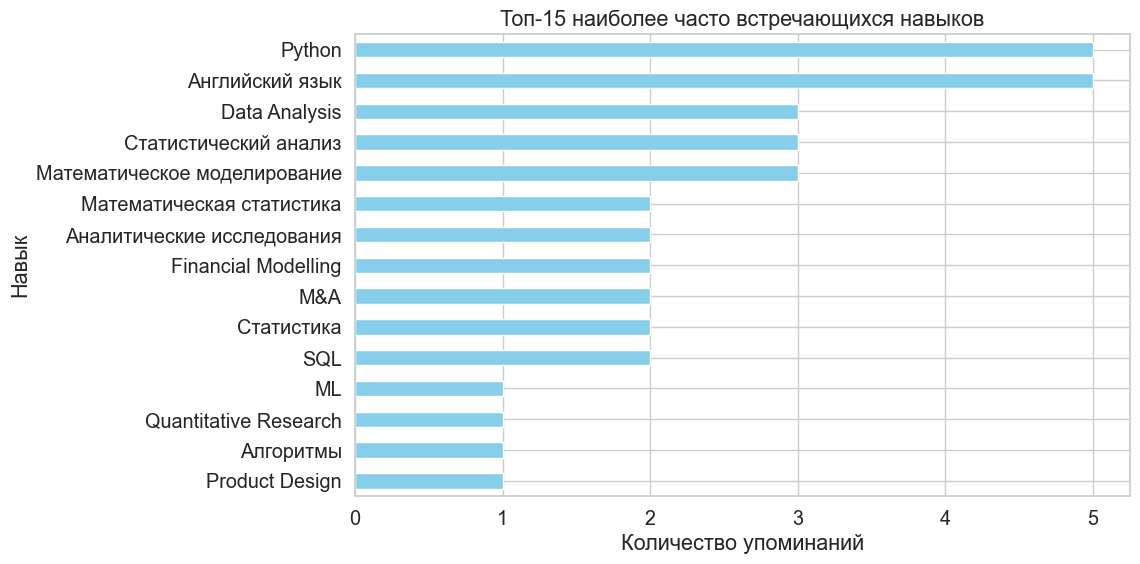

In [24]:
all_skills_quant = []
reqs1 = []
for i in range(16):
    vacancy_quant = quant_df["id"].iloc[i]
    quantvacancy_url = f"https://api.hh.ru/vacancies/{vacancy_quant}"

    req1 = requests.get(quantvacancy_url)
    quantvacancy_info = json.loads(req1.content.decode())
    reqs1.append(req1)
    if 'key_skills' in quantvacancy_info:
        skills_list = [skill['name'] for skill in quantvacancy_info['key_skills']]
        all_skills_quant.extend(skills_list)

skills_count = pd.Series(all_skills_quant).value_counts()

top_skills = skills_count.head(15)

top_skills.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Топ-15 наиболее часто встречающихся навыков')
plt.xlabel('Количество упоминаний')
plt.ylabel('Навык')
plt.gca().invert_yaxis()
plt.show()

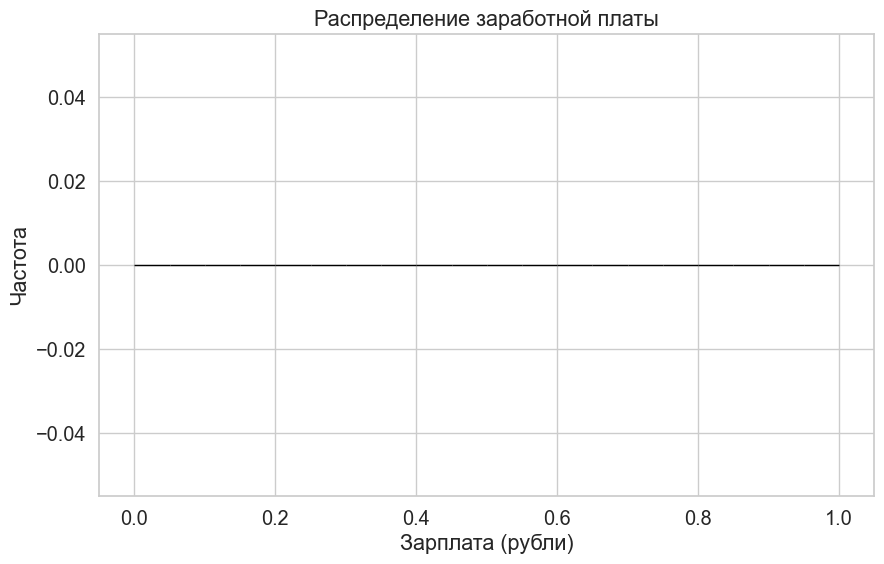

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

salaries_quant = []

for req1 in reqs1:
    quantvacancy_info = json.loads(req1.content.decode())

    salary1 = quantvacancy_info.get('salary')
    if salary1:
        if salary1.get('currency') == 'RUR' and salary1.get('gross') == False:
            salary_from = salary1.get('from')
            salary_to = salary1.get('to')
            if salary_from and salary_to:
                salary_avg = (salary_from + salary_to) / 2
                salaries.append(salary_avg)

salaries_df_quant = pd.DataFrame(salaries_quant, columns=['Зарплата (рубли)'])

plt.figure(figsize=(10, 6))
plt.hist(salaries_df_quant['Зарплата (рубли)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение заработной платы')
plt.xlabel('Зарплата (рубли)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Не забывайте про выводы.
> По вакансии quantitative researcher нет информации по зарплате и таких вакансий на рынке меньше чем аналитиков. Навыки для кванта нужны немного другие, но также есть некоторые пересечения


---

### <font color="green"><i>Факультативная часть</i></font>

---

### Задача 2.   

Для *одной* из рассмотренных ранее профессий исследуйте, в каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом.
Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [52]:
import folium
from folium.plugins import HeatMap

lngs = []
lats = []
for req in reqs:
    vacancy_info = json.loads(req.content.decode())

    address = vacancy_info.get('address')
    if address:
        lat = address.get('lat')
        lng = address.get('lng')
        lats.append(lat)
        lngs.append(lng)


merged_df['lat'] = pd.DataFrame(lats, columns=['широта'])
merged_df['lng'] = pd.DataFrame(lngs, columns=['долгота'])
coords_profession_df = merged_df[['lat', 'lng']]

areas = coords_profession_df.value_counts()
print(areas)

coords_profession_df_cleaned = coords_profession_df.dropna(subset=['lat', 'lng'])

coordinates = coords_profession_df_cleaned[['lat', 'lng']].values.tolist()

moscow_map = folium.Map(location=[55.7558, 37.6176], zoom_start=11)

for coord in coordinates:
    folium.CircleMarker(location=coord, radius=5, color="red", fill=True).add_to(moscow_map)

heat_data = [[coord[0], coord[1], 1] for coord in coordinates]
HeatMap(heat_data).add_to(moscow_map)

moscow_map.save('moscow_heatmap.html')
moscow_map.save('moscow_heatmap.html')

display(moscow_map)

lat        lng      
55.746791  37.630257    2
55.755864  37.617698    2
55.621607  37.669154    1
55.779054  37.588611    1
55.759218  37.665704    1
55.760089  37.662776    1
55.761477  37.605292    1
55.765817  37.642222    1
55.765858  37.633517    1
55.767590  37.600945    1
55.770476  37.622199    1
55.771940  37.675127    1
55.772558  37.618426    1
55.773631  37.605580    1
55.780846  37.570051    1
55.782764  37.665753    1
55.782906  37.598232    1
55.785979  37.660521    1
55.789461  37.551735    1
55.792361  37.527615    1
55.804471  37.590344    1
55.805250  37.519863    1
55.840240  37.492024    1
55.860509  37.483229    1
55.875784  37.445320    1
55.909171  37.778290    1
55.756168  37.552534    1
55.755333  37.606397    1
55.650145  37.539626    1
55.728783  37.610988    1
55.679154  37.630104    1
55.684838  37.560188    1
55.689040  37.624534    1
55.692932  37.665363    1
55.702384  37.693597    1
55.703023  37.695070    1
55.703129  37.623313    1
55.710027  37.623

Какие выводы можно сделать из построенных графиков?
> Очевидно что количество вакансий в центре города больше так как там расположены офисы компаний, которые ищут кандидатов.

---

### Задача 3.   

**1.** Проверьте, во скольких вакансиях среди выгруженных указана зарплата?


In [53]:
salaries = []
cnt=0
# Цикл для обработки информации о зарплате для каждой вакансии
for req in reqs:
    vacancy_info = json.loads(req.content.decode())

    # Извлекаем информацию о зарплате из данных о вакансии
    salary = vacancy_info.get('salary')
    if salary:
        cnt+=1

print(cnt)

56


На основе описания вакансий с известной зарплатой попробуйте оценить ожидаемую зарплату для всех остальных вакансий. Для этого на основе текстового описания вакансии можно построить эмбеддинги (любые подходящие нейросетевые или просто one-hot кодирование). По этим эмбеддингам обучите некоторую модель предсказывать зарплату. 

Не забудьте по общий пайплайн ML-моделей, а также про применимость различных методов.

In [68]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import TensorDataset, DataLoader

salaries = []
texts = []
new_texts = []

for req in reqs:
    vacancy_info = json.loads(req.content.decode())

    salary = vacancy_info.get('salary')
    if salary:
        if salary.get('currency') == 'RUR' and salary.get('gross') == False:
            salary_from = salary.get('from')
            salary_to = salary.get('to')
            if salary_from and salary_to:
                salary_avg = (salary_from + salary_to) / 2
                salaries.append(salary_avg)
                texts.append(vacancy_info.get('description'))
    new_texts.append(vacancy_info.get('description'))

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=1)

inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')

dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], torch.tensor(salaries))
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.05)
loss_fn = torch.nn.MSELoss()

model.train()
for epoch in range(10):
    total_loss = 0
    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = loss_fn(outputs.logits.squeeze(-1), labels.float())
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}')

for i in range(len(new_texts)):
    inputs_new = tokenizer(new_texts[i], padding=True, truncation=True, return_tensors='pt')
    outputs_new = model(**inputs_new)
    predicted_salaries = outputs_new.logits.squeeze(-1).detach().numpy()
    print(predicted_salaries)

C:\Users\Gregory\PycharmProjects\mipt_stats_hw10\venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[0.3442178]
[0.37600803]
[0.35779902]
[0.26738262]
[0.42570752]
[0.31642544]
[0.42698717]
[0.36176878]
[0.31575686]
[0.4124878]
[0.32008195]
[0.32904103]
[0.37318894]
[0.35726637]
[0.28727072]
[0.3187922]
[0.2904198]
[0.36226264]
[0.43578345]
[0.3992462]
[0.39394823]
[0.31784466]
[0.3926254]
[0.3660613]
[0.37521148]
[0.28541178]
[0.42850938]
[0.3413032]
[0.3437439]
[0.38251773]
[0.28278527]
[0.3413032]
[0.3188057]
[0.3435526]
[0.32528868]
[0.33450153]
[0.3524572]
[0.23603801]
[0.47612673]
[0.39380583]
[0.31442016]
[0.39376697]
[0.33662954]
[0.29966694]
[0.32801628]
[0.36143526]
[0.33317974]
[0.38525704]
[0.4500196]
[0.39475307]
[0.31416613]
[0.3900213]
[0.29831713]
[0.2820554]
[0.39309627]
[0.37278914]
[0.31786513]
[0.33654758]
[0.44415388]
[0.44992796]
[0.3557899]
[0.3753536]
[0.32867092]
[0.34334996]
[0.40861306]
[0.3625923]
[0.32809058]
[0.27524033]
[0.32424483]
[0.38656104]
[0.2884055]
[0.37691504]
[0.35519457]
[0.45300636]
[0.33546996]
[0.39589563]
[0.4578352]
[0.34342676]
[0.3198

ValueError: You need to specify either `text` or `text_target`.

**2.** Выполните кластеризацию вакансий, используя построенные эмбеддинги. Визуализируйте результаты и проинтерпретируйте кластеры.

Не забывайте про выводы.

> Из-за маленького датасета модель не обучилась достаточно хорошо в связи с чем выдавала предсказанную зарплату <1, что не соответствует действительности